# Numpy

In [1]:
import numpy as np

In [23]:
a = np.array([[0,1,2,3,4] for _ in range(5)])

In [24]:
for _ in range(1,len(a)):
    a[_:] += 10

In [25]:
a

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [26]:
a[0, 3:5]

array([3, 4])

In [27]:
a[4:,4:]

array([[44]])

# 내부구조

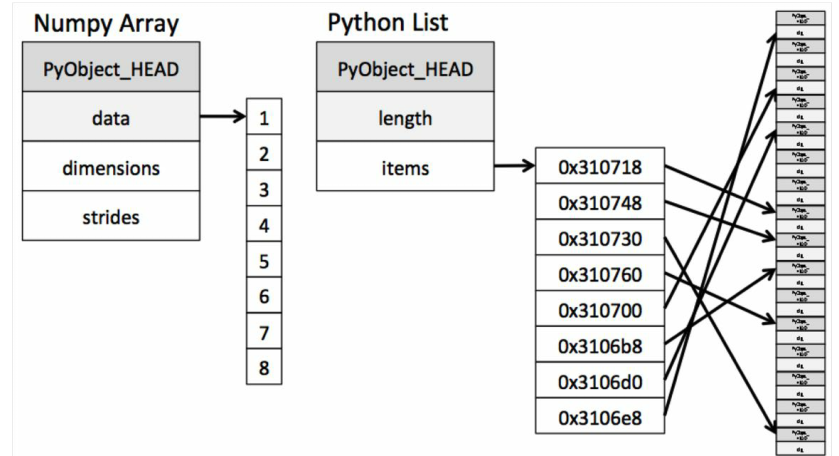
- python list는 내부구조가 linked list로 되어있다.
    - 값을 추가 삭제하기는 편하지만, 메모리 구조가 복잡해서 값을 찾는데 오래 걸리는 단점이 있다.
- numpy는 메모리에 일렬로 저장된다.
    - stride 개념을 활용하여 빠르게 값을 찾을 수 있다.

# stride 개념

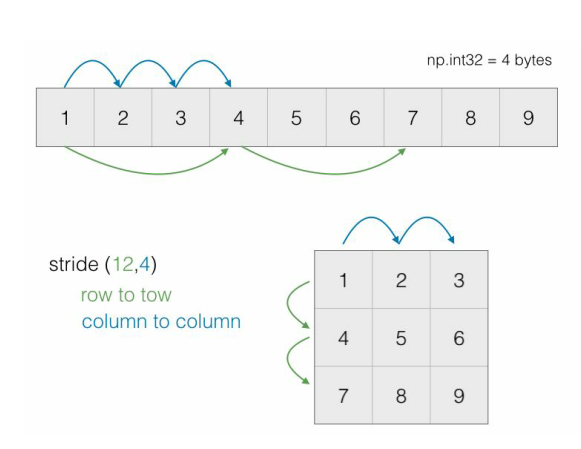
- numpy는 메모리에 연속적으로 저장되고, dtype이 동일한 homogeneous이기 때문에 data size만 알면 값을 금방 찾아갈 수 있다.
- stride는 itemsize만큼 건너뛰면 다음 item이 나오는 구조이다.
- numpy는 stride를 이용해서 다음 차원도 금방 찾을 수 있다. (itemsize \* 행의 크기)
    - 행렬이라도 메모리 상에는 모두 일렬로 저장된다. stride를 통해서 차원을 구분한다.

In [50]:
a = np.arange(9).reshape((3,3))

In [51]:
a.dtype # 숫자 나누기 8하면 itemsize이다.

dtype('int32')

In [52]:
a.itemsize

4

In [53]:
a.strides # row stride, column stride

(12, 4)

> - 각 원소는 메모리를 4만큼 차지한다.
- 메모리 상에 연속적으로 저장했을때 column to column은 메모리 크기만큼 구분된다.
    - dtype이 int32이므로 메모리 크기는 4이고, column stride = 4
- 메모리 상에 연속적으로 저장했을때 row to row 는 (메모리 크기 x 행에 포함된 원소 개수) 만큼 구분된다.
    - 행에 원소가 3개씩 있고 메모리 크기는 4이므로, row stride = 12

# axis 개념

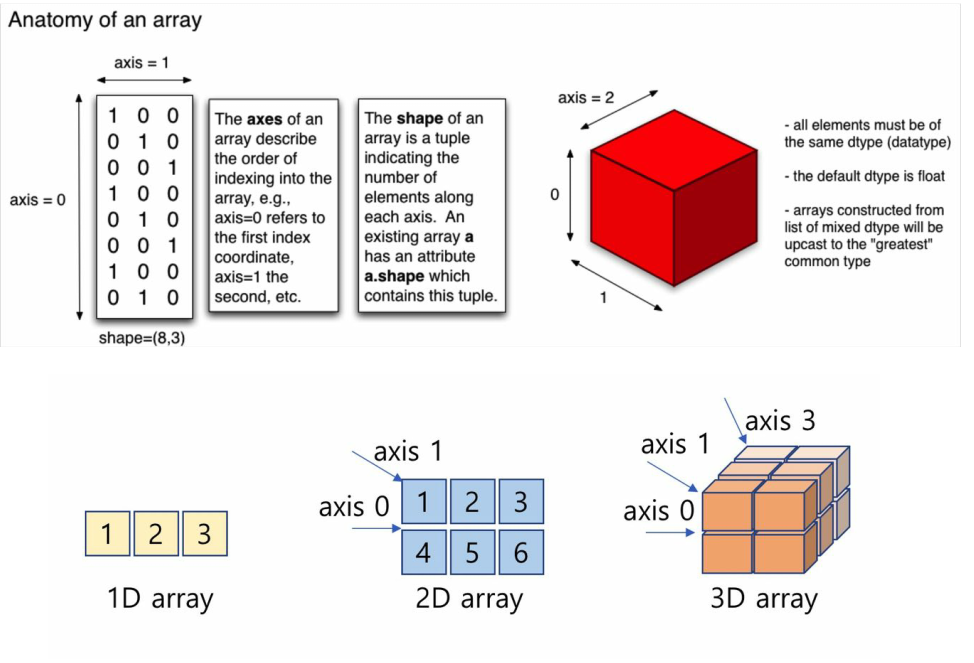
- axis는 차원의 축이다.
- stride를 활용해서 axis를 구분한다.
- 행렬에서 axis=0은 "행끼리" 계산한다고 이해하면 된다.
- 행렬에서 axis=1은 "열끼리" 계산한다고 이해하면 된다.

In [54]:
a = np.arange(100).reshape((10,10))

In [55]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [56]:
a.mean(axis=0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [57]:
a.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5])

In [58]:
a.mean(axis=None)

49.5

> 평균을 계산하는 `mean`은 `axis`에 따라서 결과가 다르다.
- axis=0은 행끼리 평균을 내었으므로 각 열의 평균이 된다.
- axis=1은 열끼리 평균을 내었으므로 각 행의 평균이 된다.
- axis=None은 전체 평균을 낸다.

# 연산자 우선순위
- 파이썬은 연산자 오버로딩만 가능하기 때문에 연산자를 새로 정의할 수는 있으나, 파이썬에 있는 연산자만 쓸 수 있다.
    - `@`는 넘파이의 요청으로 만들어진 연산자다.
- 파이썬은 연산자 우선순위 때문에 다음같이 할때는 괄호를 써줘야한다.


In [87]:
# Error

a[a>90 & a>10]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [88]:
a[(a>90) & (a>10)]

array([91, 92, 93, 94, 95, 96, 97, 98, 99])

> 연산자 우선순위 때문이다.
- 가장 높은 우선 순위부터 연산한다.
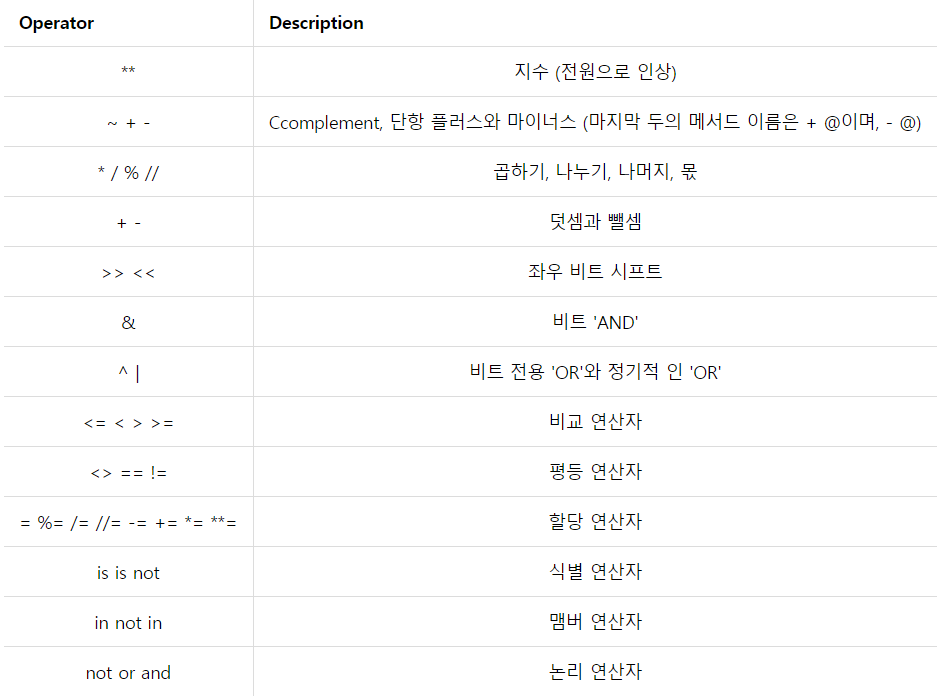
출처: https://wikidocs.net/1165

- 파이썬에서 &는 bit-wise 연산자이다.
    - 흠.. 공부..

In [102]:
0b0 & 0b1

0

# Reduction technique (중요한 개념)
결과를 하나로 **축약** 시키는 것이다.  
즉,  **대표성**을 갖는다.

어떤 값을
- 축약하고 싶으면 reduce
- 축적하고 싶으면 accumulate

In [70]:
from functools import reduce

In [72]:
# map, filter, reduce는 higher order function --> 함수를 인자로 쓸 수 있다.

reduce(np.add, [1,2,3,4])

10

In [68]:
# 빠밤!

np.add.accumulate([1,2,3,4])

array([ 1,  3,  6, 10], dtype=int32)

> - 새로운 개념 accumulate를 소개합니다.
- reduce랑 비슷한데 누적해서 저장하는 방식

In [74]:
from itertools import accumulate

In [77]:
list(accumulate([1,2,3,4], lambda x,y: x+y))

[1, 3, 6, 10]

> - 파이썬에도 accumulate가 있다.
- map, filter, reduce는 함수가 먼저 왔었는데 accumulate는 iterable이 먼저 온다.
    - 헷갈리기 쉽다.
    - 값을 축약하는 reduce와 반대라서 인자 순서도 반대라고 외우는 팁

In [78]:
np.sum(a, axis=1)

array([ 45, 145, 245, 345, 445, 545, 645, 745, 845, 945])

> `sum`도 reduction이다!

# ufunc
universal function.  
중요!  
컨테이너 타입과, 컨테이너 타입이 아닌 것 모두 사용할 수 있는 함수를 ufunc이라고 한다.

In [79]:
# Error

sum(1)

TypeError: 'int' object is not iterable

In [80]:
sum([1])

1

> - 파이썬은 `sum`에 iterable만 넣을 수 있기 때문에 값을 하나면 넣으려면 iterable로 만들어야한다.

In [81]:
np.sum(1)

1

> - numpy의 `np.sum`은 ufunc이므로 값 하나만 넣어도 에러를 내지 않는다. 
- numpy의 연산 함수는 python의 것과 거의 똑같다. 
    - numpy의 ufunc이 너무나 편해서 python 단순 작업할때도 numpy를 쓰고 있는 나 자신을 발견할 수 있다.

# scipy
- SciPy는 파이썬을 기반으로 하여 과학, 분석, 그리고 엔지니어링을 위한 과학(계산)적 컴퓨팅 영역의 여러 기본적인 작업을 위한 라이브러리(패키지 모음)
- 우리가 필요한 대부분의 기능은 이미 누군가 구현해 놓았다!
    - numpy에 필요한 기능이 없을때는 직접 구현하기 전에 scipy에 있는지 확인해보자.

In [98]:
 from scipy.special import factorial

In [100]:
# vectorize 

factorial([1,2,3,4,5])

array([  1.,   2.,   6.,  24., 120.])

> - vectorize: 여러개를 묶어서 한꺼번에 각각 계산해준다.
    - 여러개를 동시에 처리한다고 설명하는 곳도 있다.

In [ ]:
# 통계관련된 기능은 모두 여기에 있다. 
# 딥러닝하면서는 많이 쓸 일이 없다.

from scipy.stats import *

# shape
numpy에서 shape이 맞아야 연산이 가능하므로 항상 확인해야합니다.

In [103]:
a = np.arange(20)

In [104]:
# 모양을 바꾸는 reshape

a.reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [105]:
# 다시 a를 호출하면 모양이 다시 돌아옴.

a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

> - numpy는 immutable이라서 자기자신을 바꾸려면 재할당하는 방법 밖에 없다.
- mutable처럼 자기 자신을 바꾸는 함수가 없다.
    - 예외적인 케이스가 numpy에 몇가지가 있기는 하다.

In [106]:
id(a)

1662408511200

In [107]:
id(a[1])

1662408544688

In [108]:
a[1] = 100

In [109]:
id(a)

1662408511200

In [110]:
id(a[1])

1662408544736

> 재할당하면 `a`의 메모리 주소는 그대로이지만, `a[1]`은 메모리 주소가 바뀌었다.

In [114]:
# Error

a.reshape(5,3)

ValueError: cannot reshape array of size 20 into shape (5,3)

> - `reshape`는 원소 개수와 모양이 안 맞으면 에러가 발생한다.

In [111]:
a.reshape(5,-1)

array([[  0, 100,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19]])

In [112]:
a.reshape(5,-2)

array([[  0, 100,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19]])

> - `reshape`에 음수가 들어가면 모양을 알아서 맞춰준다.
- `-1`만 된다고 하는 책들도 많은데 소스코드를 뜯어보면 0보다 작으면 된다고 함

In [115]:
a = np.arange(20)

In [116]:
# a 원소 개수는 20개이지만, 바꿀 모양이 작게 했다.

np.resize(a, (4,3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [117]:
# a 원소 개수는 20개이지만, 바꿀 모양이 크게 했다.

np.resize(a, (4,6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19,  0,  1,  2,  3]])

> - `reshape`과 다르게 `resize`는 원래 원소 개수와 바꿀 모양의 원소 개수가 안 맞으면 원소 개수를 줄이거나 늘려준다.

In [118]:
# Error

a.resize((3,5))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [120]:
a.resize((3,5), refcheck=False)

In [121]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

> - `resize`을 메서드로 사용하려면 reference check가 걸려있어서 에러가 난다.
- `refcheck=False` 옵션을 써서 바꿀 수 있다. 
    - 단, 자기 자신이 바뀐다.
- `resize`는 값이 바뀌므로 위험해서 잘 사용하지 않는다.

In [122]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [123]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [125]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

> `ravel`과 `flatten`은 1차원으로 바꿔주는 메서드이다.

In [127]:
b = a.ravel()

In [128]:
b[1] = 100

In [129]:
a

array([[  0, 100,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14]])

> **차이점**
- `ravel`은 view
    - view는 바꾸면 자기 자신도 바뀐다.
    - 바뀔 때 같이 바뀌는 것이 view
- `flatten`은 copy
    - copy는 복사하므로 원래 녀석과 다른 녀석이다.
    - 바꿔도 원래 것이 안 바뀌는 것이 copy

In [135]:
x = [1,2,3,4,5]
b = x[:3]
b[0] = 100
x

[1, 2, 3, 4, 5]

In [136]:
x = np.array([1,2,3,4,5])
b = x[:3]
b[0] = 100
x

array([100,   2,   3,   4,   5])

> 같은 slicing, 다른 기능 --> **헷갈리지 말자**
- python에서는 슬라이싱하면 copy
- numpy에서는 슬라이싱하면 view

# Broadcasting
- 모양이 안 맞아도 알아서 맞춰주는 편리한 기능!
- scalar 또는 1차원일 때만 가능하다
- 늘려주는 것을 보고 stretch라고 한다.
    - stretch는 연산 비용이 적게 든다.
    - ones_like 같은 것을 안 써도 된다.
- 많이 사용하고, tensorflow에도 쓰인다!

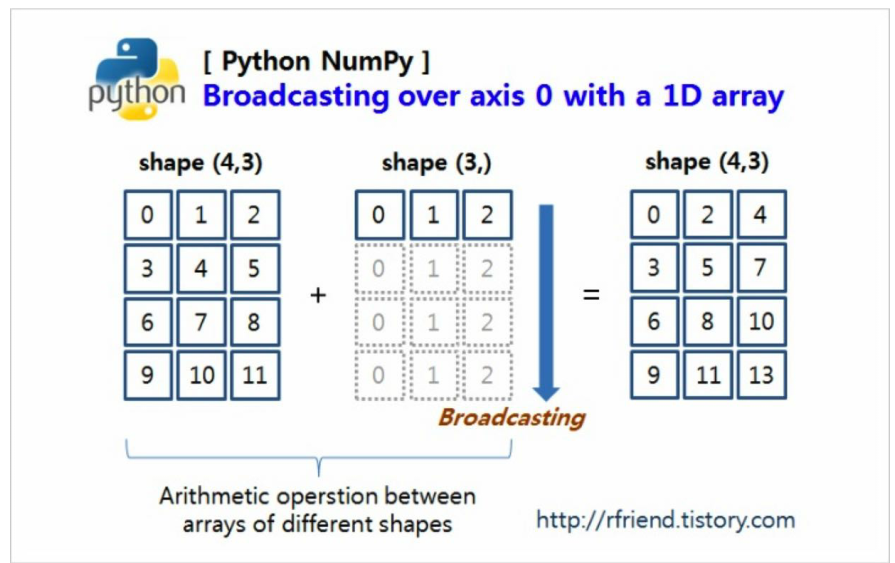
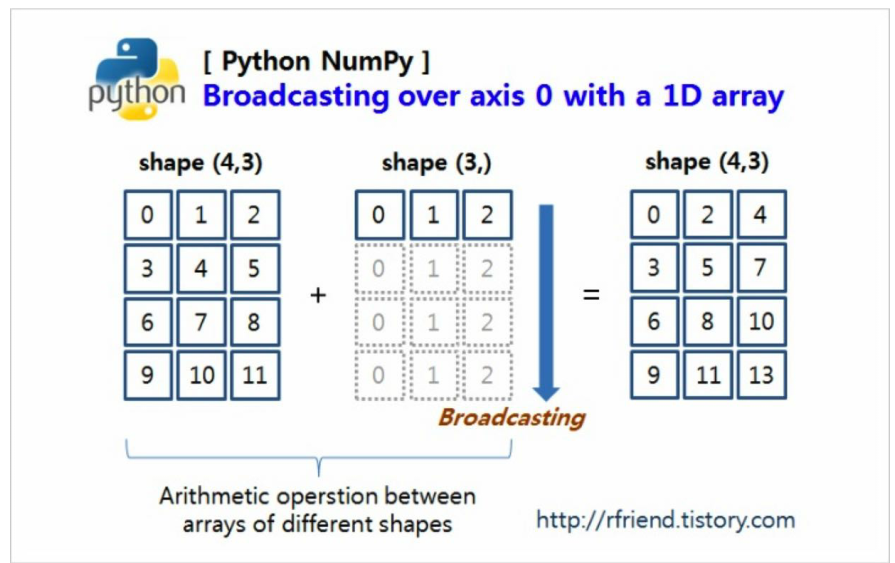

In [142]:
a = np.arange(20).reshape(5,-2)

In [143]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [149]:
a + 1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20]])

In [145]:
a * 4

array([[ 0,  4,  8, 12],
       [16, 20, 24, 28],
       [32, 36, 40, 44],
       [48, 52, 56, 60],
       [64, 68, 72, 76]])

In [150]:
a + [2,2,2,2]

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21]])

> - scalar일 때는 stretch되어서 ones_like한 것과 같은 효과이다. 
- 1차원일 때는 차원은 달라도 모양은 맞아야 한다.

# 쪼개기

In [152]:
a = np.arange(20).reshape(4,5)

In [158]:
np.split(a, indices_or_sections=2)

[array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]), array([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])]

In [157]:
len(np.split(a, indices_or_section=2))

2

> `indices_or_section`
- `indeces`는 몇 개로 쪼갤 것인지를 의마한다.
    - 숫자를 입력하면 `indeces`
    - 등간격으로 쪼개준다.
- `section`은 범위를 의미한다.
    - tuple 또는 list를 입력하면 `section`

In [160]:
np.split(a, (1,4))

[array([[0, 1, 2, 3, 4]]), array([[ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]), array([], shape=(0, 5), dtype=int32)]

> - `indices_or_section=(1,4)`은 \[:1\], \[1:4\], \[4:\]로 쪼개준다.
- 마지막이 비어있는 array인 이유는 \[4:\]이기 때문이다. --> 섹션을 3개로 쪼갰기 때문에 값이 비어있어도 개수를 맞춰서 return한다.

In [161]:
np.split(a, (2,2))

[array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]),
 array([], shape=(0, 5), dtype=int32),
 array([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])]

> - `indices_or_section=(2,2)`은 \[:2\], \[2:2\], \[2:\]로 쪼개준다.
- \[2:2\]는 비어있기 때문에 중간에 빈 array가 있다.

In [164]:
np.split(a, (1,4), axis=1)

[array([[ 0],
        [ 5],
        [10],
        [15]]), array([[ 1,  2,  3],
        [ 6,  7,  8],
        [11, 12, 13],
        [16, 17, 18]]), array([[ 4],
        [ 9],
        [14],
        [19]])]

> axis 개념을 섞어서 쪼개는 것도 가능하다.

In [162]:
np.vsplit(a, (4,5))

[array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]),
 array([], shape=(0, 5), dtype=int32),
 array([], shape=(0, 5), dtype=int32)]

In [163]:
np.hsplit(a, (4,5))

[array([[ 0,  1,  2,  3],
        [ 5,  6,  7,  8],
        [10, 11, 12, 13],
        [15, 16, 17, 18]]), array([[ 4],
        [ 9],
        [14],
        [19]]), array([], shape=(4, 0), dtype=int32)]

> - axis가 어려울때 `vsplit`은 vertical, `hsplit`는 horizontal 이므로 외워서 쓰기 편하다.
- 3차원 이상은 `dsplit`을 사용할 수 있는데 좀 헷갈린다.

# 붙이기

In [167]:
a = np.arange(10).reshape(2,-1)
b = np.arange(10,20).reshape(2,-1)

In [169]:
np.concatenate((a,b))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

> `concatenate`

In [170]:
np.vstack((a,b))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

> `vstack`는 vertical하게 쌓아준다.

In [171]:
np.hstack((a,b))

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9, 15, 16, 17, 18, 19]])

> `hstack`는 horizaontal하게 쌓아준다.

In [172]:
np.stack((a,b), axis=0) 

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

> `stack`은 axis 개념이 있다.
- `stack`만으로 `vstack`, `hstack` 모두 만들 수 있다.
- `vstack`, `hstack`는 자주사용하므로 편의상 만들었다.

In [175]:
np.concatenate((a,b)).shape

(4, 5)

In [173]:
np.stack((a,b), axis=0).shape

(2, 2, 5)

> - `concatenate`와 `stack`은 결과의 차원이 다르다.
- `stack` --> Docstring:
Join a sequence of arrays along a new axis.
- `stack`은 새로운 차원이 하나 추가되었다. --> 쌓는 개념
- `concatenate`는 차원은 그대로이되 모양이 바뀌었다. --> 붙이는 개념